## Data Exploration


In [0]:
import numpy as np
import pandas as pd
import scipy as sp
from textblob import TextBlob
from textblob import Word
import language_check
import enchant
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time
import nltk
import xlrd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
%matplotlib inline

### Examine Dataset

In [0]:
xl_workbook = pd.ExcelFile('training_set_rel3.xlsx')
df = xl_workbook.parse("training_set")
df = df[df['domain1_score'] < 13]
df = df.dropna(axis = 1)

In [0]:
essays = df['essay']
essays[11]

u"Dear @CAPS1 @CAPS2 I feel that computers do take away from peoples life and aren\u2019t as important than the other factors of life. First of all you know that the world is becoming obease because of lack of exercise. Also people don't realize that @CAPS3 warming is becomeing a big problum. Finally familys arn't as close as they used to be. these are all the reasons why computers arn't important to human socioty. First of the world is becomeing obease and cumputers play a huge part in this. Computers don't make people exercise they basicly just sit down on there couch and use the computer this won't help amarica get back into shape. Also computers become a habbit if a person uses a computer everyday of there life it will become an addiction then they won't be able to stop. Finally when people use the computer they don't realize the lack exersise there getting. This is the first reason why computeres are a bad thing. Next @CAPS3 warming is mealting the polar ice caps. Computers play a

In [0]:
#for spelling correction purporses, we will be removing any words with @ and % in them. 
def character_filter(words):
    punc = ["@","%"]
    for p in punc: 
        words = [word for word in words if p not in word]
        
    return words

### Analysis

In [0]:
num_rows = df.shape[0]
essays = df['essay'].values

#initialize dataframe columns
df['essay length'] = np.nan 
df['sentence length'] = np.nan
df['average word length'] = np.nan 
df['sentiment'] = np.nan 
df['spelling'] = np.nan
df['grammar'] = np.nan

#check computation time
start = time.time()

#loop through each essay
for i in range(num_rows):  
    
    blob = TextBlob(essays[i])
    
    #number of words
    df.set_value(i,'essay length',len(blob.words))
    
    #sentence length
    sentence_len = [len(sentence.split(' ')) for sentence in blob.sentences]
    df.set_value(i,'sentence length', sum(sentence_len) / len(sentence_len))
    
    #essay sentiment
    df.set_value(i,'sentiment',blob.sentiment.polarity)
    
    #average word length
    word_len = [len(word) for word in blob.words]
    df.set_value(i,'average word length',sum(word_len) / len(word_len))
    
    #number of grammar mistakes
    tool = language_check.LanguageTool('en-US')
    matches = tool.check(essays[i])
    df.set_value(i,'grammar',len(matches))
    
    #spelling mistakes
    #this exception is made to catch any spelling errors cause by \u2019 apostraphies
    try:
        d = enchant.Dict('en_US')
        words = character_filter(blob.words)
        checks = [d.check(word) for word in words]
        df.set_value(i,'spelling', checks.count(False))    
    except Exception:
        pass

In [0]:
df = df.drop('rater1_domain1',1)
df = df.drop('rater2_domain1',1)

In [0]:
df.head()

essay_id  essay_set                                              essay  \
0       1.0        1.0  Dear local newspaper, I think effects computer...   
1       2.0        1.0  Dear @CAPS1 @CAPS2, I believe that using compu...   
2       3.0        1.0  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3       4.0        1.0  Dear Local Newspaper, @CAPS1 I have found that...   
4       5.0        1.0  Dear @LOCATION1, I know having computers has a...   

   domain1_score  essay length  sentence length  average word length  \
0            8.0         343.0             21.0                  4.0   
1            9.0         422.0             20.0                  4.0   
2            7.0         283.0             19.0                  4.0   
3           10.0         527.0             19.0                  4.0   
4            8.0         470.0             15.0                  4.0   

   sentiment  spelling  grammar  
0   0.310471      28.0     12.0  
1   0.274000      31.0     15.0  
2   0.340393      12.0      7.0  
3   0.266828      77.0     36.0  
4   0.199684      29.0     17.0

### Visualization

In [0]:
def plots(x,y,xlabel,title,ax,color='b'):
    
    ax.scatter(x,y,color = color)
    ax.set_ylabel('Grade')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    

In [0]:
import matplotlib.cm as cm
color=cm.rainbow(np.linspace(0,1,8))

def essayplot(essay, color):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

    plots(df[df['essay_set'] == essay]['essay length'],df[df['essay_set'] == essay]['domain1_score'],'Essay Length', "Set "+str(essay)+": Essay Length vs. Essay Grade", ax1,color)
    plots(df[df['essay_set'] == essay]['sentence length'],df[df['essay_set'] == essay]['domain1_score'],'Average Sentence Length', "Set "+str(essay)+": Average Sentence Length vs. Essay Grade", ax2,color)
    plots(df[df['essay_set'] == essay]['average word length'],df[df['essay_set'] == essay]['domain1_score'],'Average Word Length', "Set "+str(essay)+": Average Word Length vs. Essay Grade",ax3,color)
    plots(df[df['essay_set'] == essay]['sentiment'],df[df['essay_set'] == essay]['domain1_score'],'Essay Sentiment', "Set "+str(essay)+": Essay Sentiment vs. Essay Grade",ax4,color)
    plots(df[df['essay_set'] == essay]['grammar'],df[df['essay_set'] == essay]['domain1_score'],'No. of Incorrect Grammar Instances', "Set "+str(essay)+": Grammar Mistakes vs. Essay Grade",ax5,color)
    plots(df[df['essay_set'] == essay]['spelling'],df[df['essay_set'] == essay]['domain1_score'],'No. of Spelling Mistakes', "Set "+str(essay)+": Spelling Mistakes vs. Essay Grade",ax6,color)
    
    fig.savefig('Essay1Features.png', bbox_inches = "tight")

### Essay Set 1

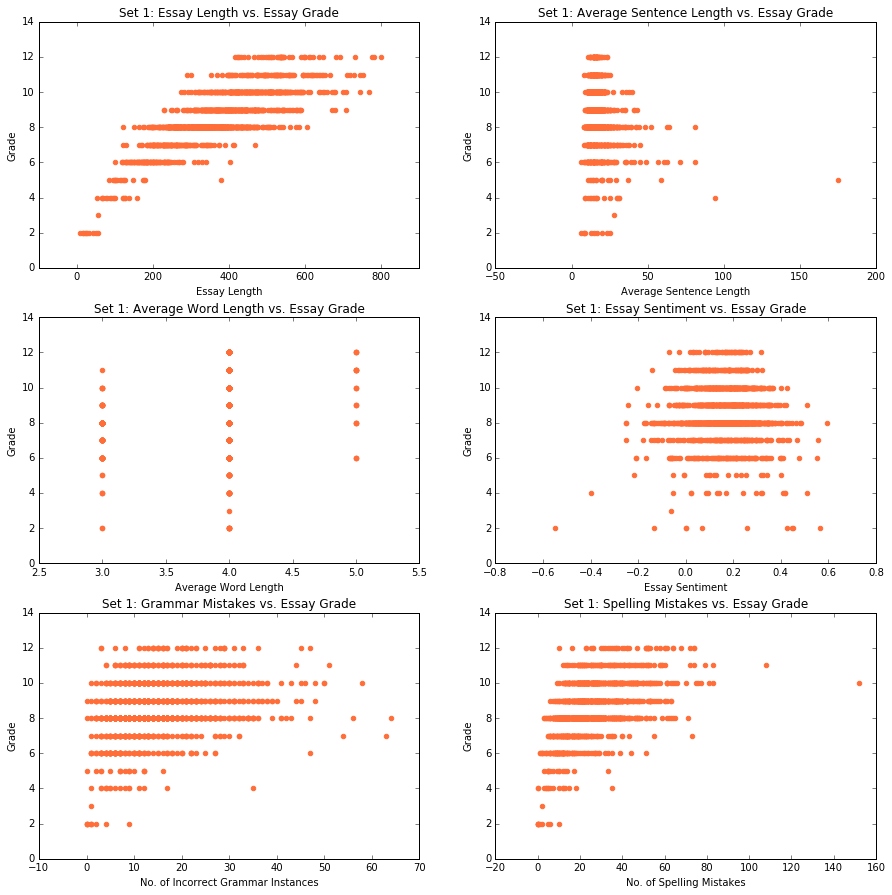

In [0]:
essayplot(1, color[6])

### Essay Set 2

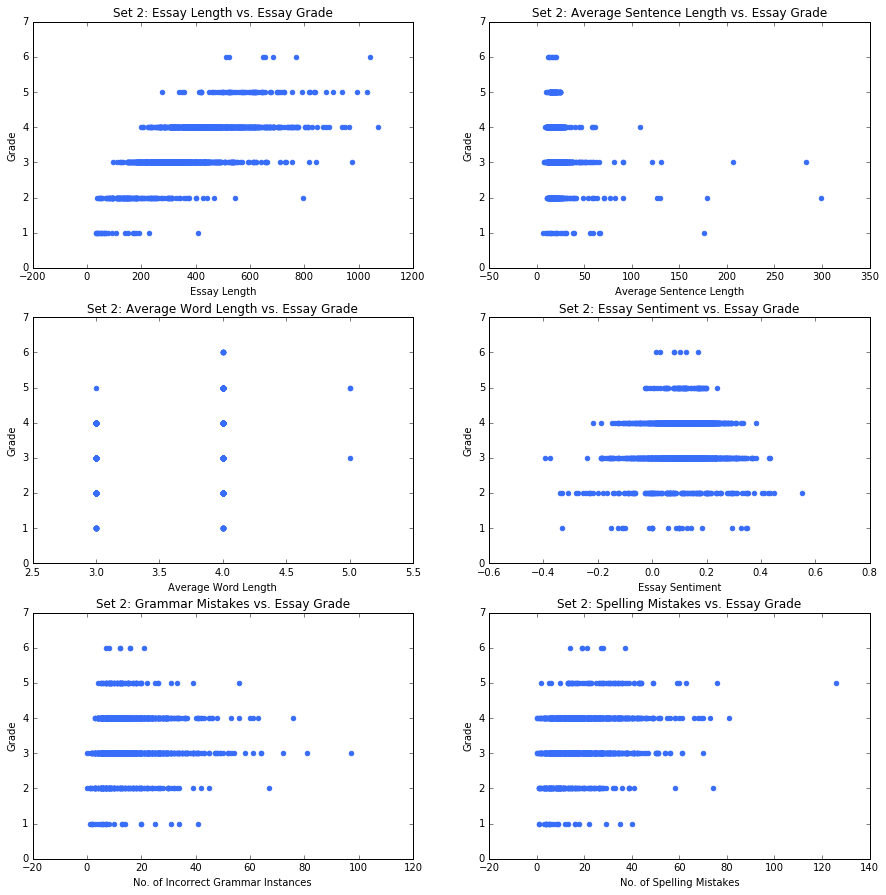

In [0]:
essayplot(2, color[1])

### Essay Set 3

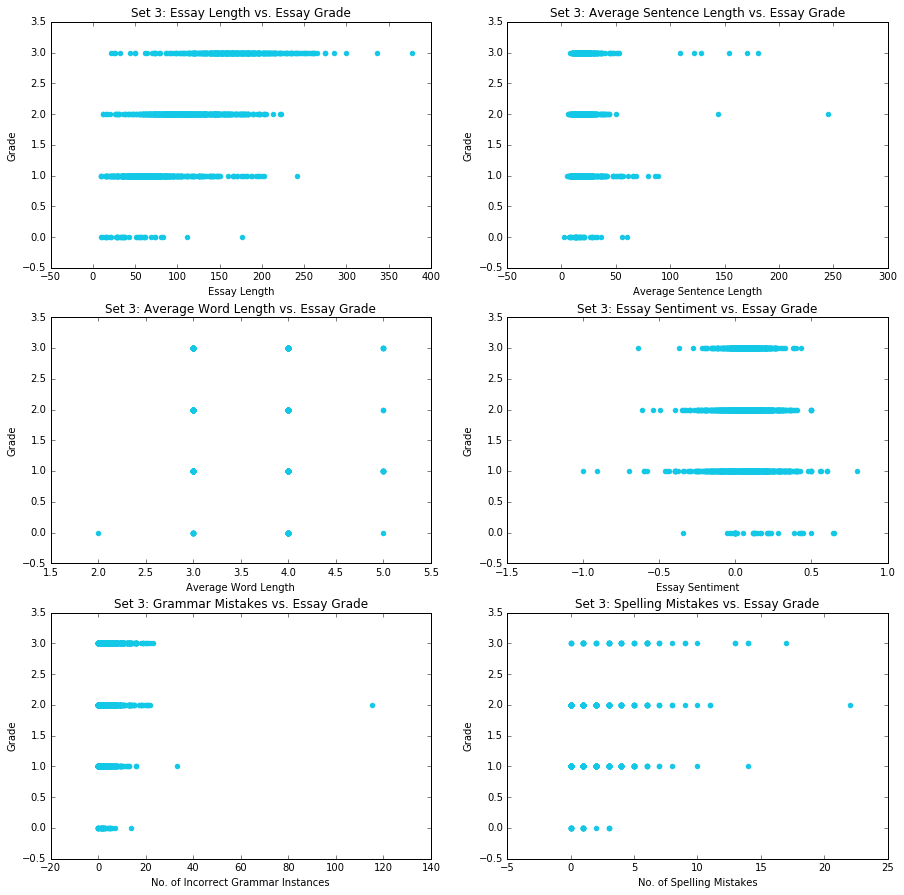

In [0]:
essayplot(3, color[2])

### Essay Set 4

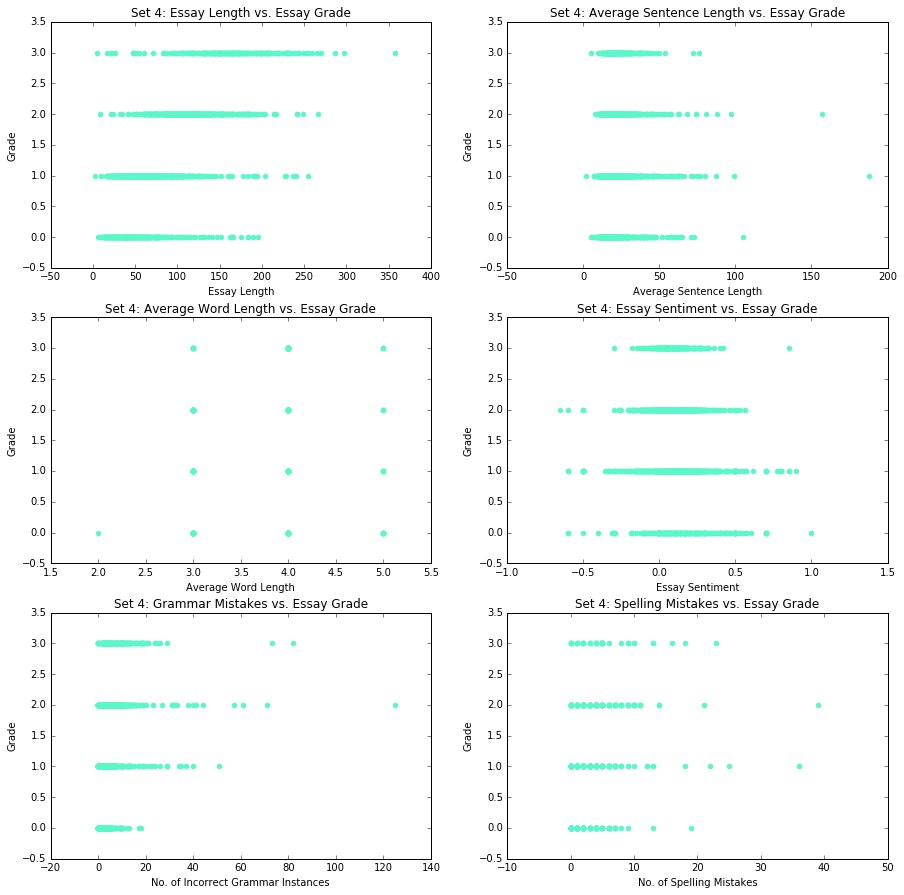

In [0]:
essayplot(4, color[3])

### Essay Set 5

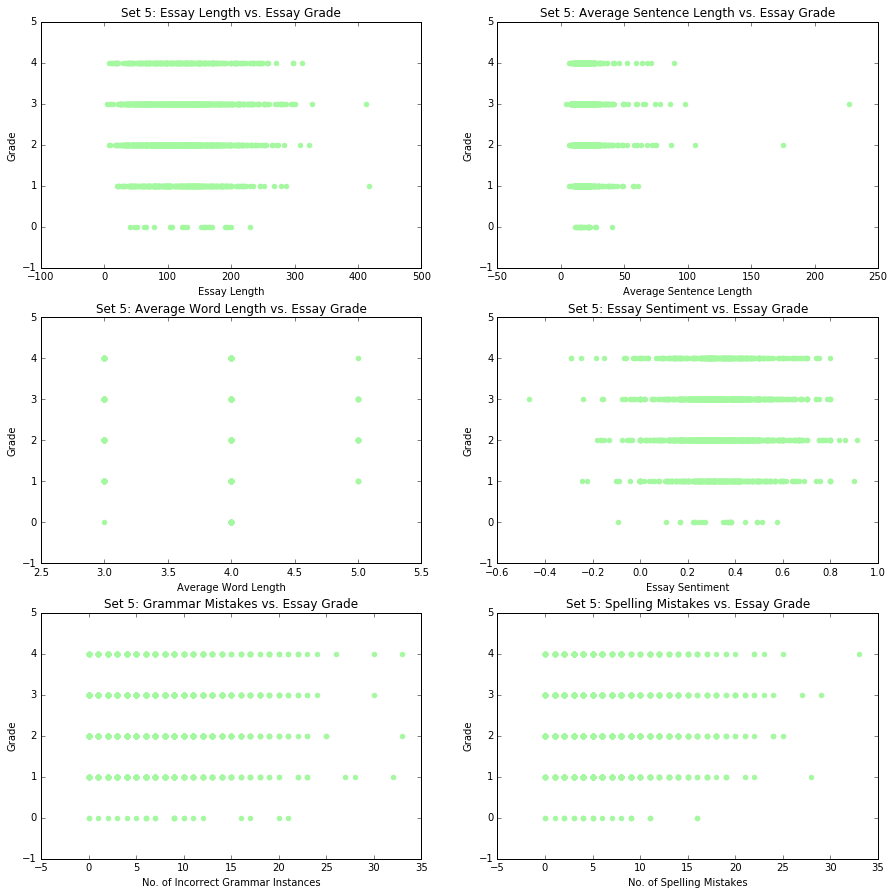

In [0]:
essayplot(5, color[4])

### Essay Set 6

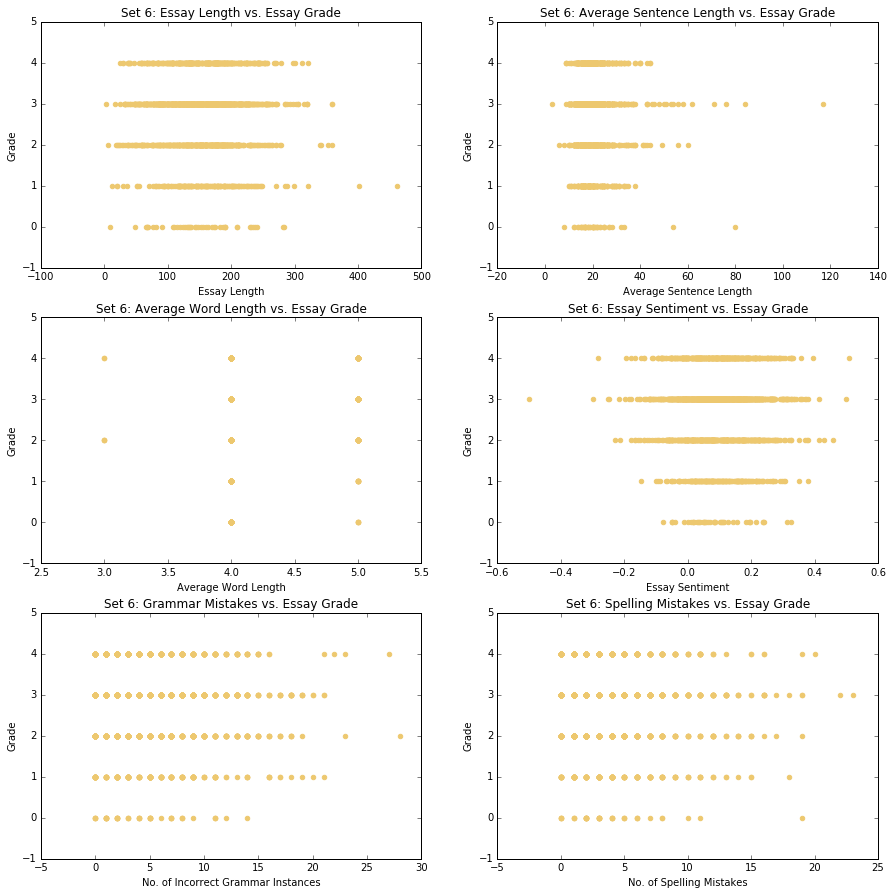

In [0]:
essayplot(6, color[5])

### Essay Set 7

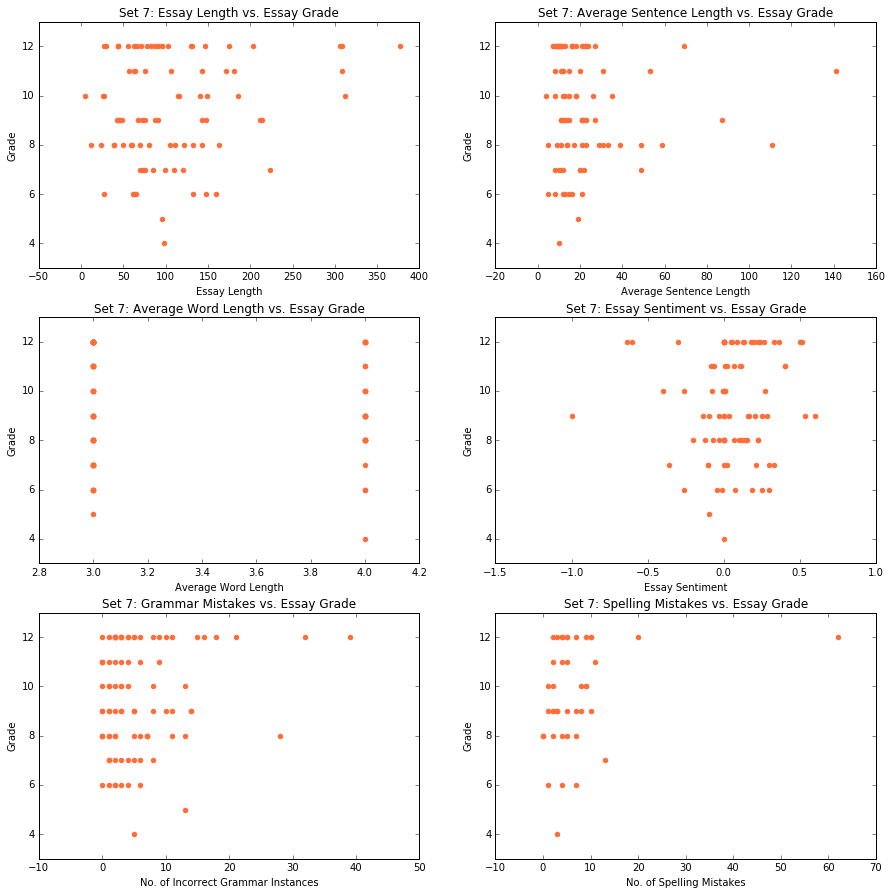

In [0]:
essayplot(7, color[6])